# <center>***两种聚类分析***<center>

更多代码欢迎传送至：
>https://gitee.com/tanxin12/tanxin

In [3]:
import numpy as np
import pandas as pd
from scipy.cluster.hierarchy import dendrogram
from sklearn import preprocessing
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import calinski_harabasz_score
import matplotlib.pyplot as plt

# 聚类分析容易因为环境变量产生警告，但无所谓，所以直接忽略警告
import warnings
warnings.filterwarnings("ignore")

## <font color=#FF0000>**1、导入数据与标准化**

In [4]:
# 导入数据
file = ".\data\Evaluation.xlsx"
df = pd.read_excel(file)

# 数据标准化
zscore = preprocessing.StandardScaler()
df = zscore.fit_transform(df)

## <font color=#FF0000>**2、寻找最好的聚类数（以K-means为例）**

In [5]:
score = np.ones(shape=(8, 1))

# 这个[2, 6]是聚类数目的最小值和最大值，这个算法会帮助我们找出最合适的类别数目
for i in range(2, 6):
    model = KMeans(n_clusters=i, random_state=0).fit(df)
    score[i - 2] = calinski_harabasz_score(df, model.labels_)

a = 0
for j in range(1, 4):
    if score[a] < score[j]:
        a = j

num = a + 2
print("最适合的聚类数为%d" % num)

最适合的聚类数为2


## <font color=#FF0000>**3、模型建立**

### <center>**K-means**<center>

In [6]:
# 定义K-means聚类模型
Model = KMeans(n_clusters=num, init='k-means++')
Model.fit(df)
# 预测聚类模型
y_pred = Model.labels_

### <center>**层次聚类**<center>

In [7]:
# 定义层次聚类模型
Model = AgglomerativeClustering(n_clusters=num, affinity='euclidean', memory=None,
                    connectivity=None, compute_full_tree='auto',
                    linkage='ward', distance_threshold=None, compute_distances=False)
Model.fit(df)
# 预测聚类模型
y_pred = Model.labels_

## <font color=#FF0000>**4、数据可视化**

In [8]:
data_final = np.ones(shape=(18, 12))
m, n = df.shape

data_final[:, 0:11] = np.array(df)
data_final[:, 11] = np.array(y_pred)

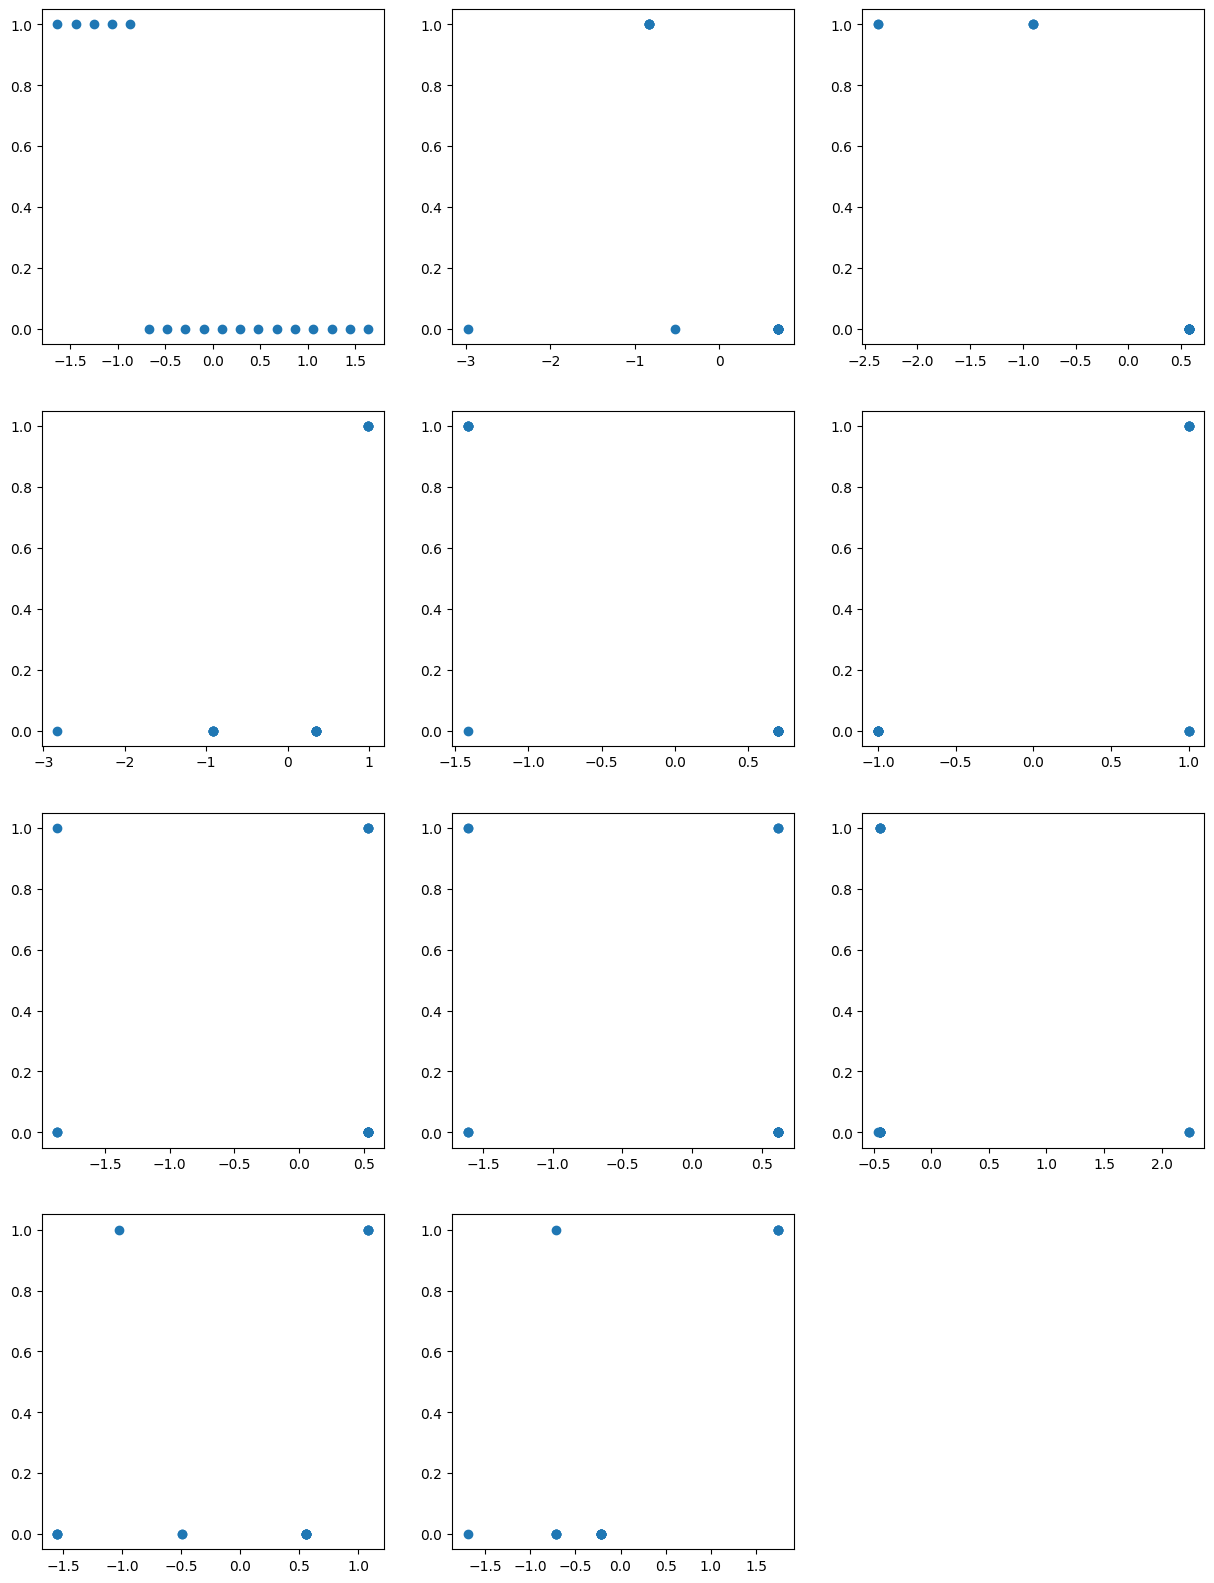

In [9]:
plt.figure(figsize=(15, 20))
for i in range(0, n):
    plt.subplot(4, 3, i + 1)
    plt.scatter(data_final[:, i], data_final[:, -1])

plt.show()

## <font color=#FF0000>**5、模型评价**

### <center>**轮廓系数（Silhouette Coefficient）**<center>

In [10]:
from sklearn.metrics import silhouette_score
# 轮廓系数（Silhouette Coefficient）
print(silhouette_score(df, y_pred, metric='euclidean', sample_size=None, random_state=5))

0.3304117909093991


### <center>**CH分数（Calinski Harabasz Score）**<center>

In [11]:
from sklearn.metrics import calinski_harabasz_score
print(calinski_harabasz_score(df, y_pred))

9.651697696137775
